<a href="https://colab.research.google.com/github/JShyam33/Facial-emotion-recognition/blob/master/Face_dec3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/serengil/tensorflow-101.git

Cloning into 'tensorflow-101'...
remote: Enumerating objects: 967, done.
remote: Total 967 (delta 0), reused 0 (delta 0), pack-reused 967
Receiving objects: 100% (967/967), 22.97 MiB | 36.03 MiB/s, done.
Resolving deltas: 100% (512/512), done.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys , os
import numpy as np
import pandas as pd
import seaborn as sn
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import TensorBoard,ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras import regularizers
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [0]:
#num_features = 64
num_labels = 7
batch_size = 15
epochs = 256
width, height = 48, 48

In [0]:
model_path = '../content/drive/My Drive/Emotion Recognition/models/model_v10_mid_mod.hdf5'
model_path2 = '../content/drive/My Drive/Emotion Recognition/models/model_v10_mid.hdf5'
model_path3 = '../content/drive/My Drive/Emotion Recognition/models/model_v10.hdf5'
csv_path = '../content/drive/My Drive/Emotion Recognition/fer2013.csv'
casc_path = '../content/drive/My Drive/Emotion Recognition/haarcascade_frontalface_default.xml'

In [0]:
with open(csv_path) as f:
  content = f.readlines()
  
  lines = np.array(content)
  num_instances = lines.size
  print("num instance : ",num_instances)

num instance :  35888


In [0]:
	
x_train, y_train, x_test, y_test = [], [], [], []
 
for i in range(1,num_instances):
    emotion, img, usage = lines[i].split(",")
    val = img.split(" ")
    pixels = np.array(val, 'float32')
    emotion = keras.utils.to_categorical(emotion, num_labels)
    if 'Training' in usage:
      y_train.append(emotion)
      x_train.append(pixels)
    elif 'PublicTest' in usage:
      y_test.append(emotion)
      x_test.append(pixels)

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [0]:
gen = ImageDataGenerator()
train_generator = gen.flow(x_train,y_train,batch_size = batch_size)


In [0]:
# old version

data = pd.read_csv(csv_path)

data = data.reindex(np.random.permutation(data.index))

pixel = data['pixels'].tolist()


faces = []
for pixel_sequence in pixel:
  face = [int(pixel) for pixel in pixel_sequence.split(' ')]
  face = np.asarray(face).reshape(width,height)
  face = face / 255.0
  face = cv2.resize(face.astype('uint8'),(width,height))
  faces.append(face.astype('float32'))
  
faces = np.asarray(faces)
faces = np.expand_dims(faces,-1)

emotions = pd.get_dummies(data['emotion']).as_matrix()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [0]:
data.head(5)

,emotion,pixels,Usage
30852,0,151 133 101 108 102 99 105 102 94 113 126 120 ...,PublicTest
18849,3,50 56 96 125 129 130 142 148 147 148 153 165 1...,Training
6213,6,145 145 143 145 144 140 62 27 25 22 41 51 51 4...,Training
28265,2,63 49 47 50 42 35 46 59 59 51 50 53 45 44 43 3...,Training
35633,2,9 8 9 8 17 111 94 106 107 63 50 43 39 26 37 75...,PrivateTest


In [0]:
# old version

x_train , x_test, y_train, y_test = train_test_split(faces,emotions,test_size=0.1,random_state=42)
x_train , x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=41)


In [0]:
model = Sequential()

model.add(Conv2D(64,(5,5),activation='relu',input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3),strides=(2,2)))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3),strides=(2,2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels , activation='softmax'))

model.summary()

W0803 16:58:48.674073 139844946413440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 16:58:48.723186 139844946413440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 16:58:48.732382 139844946413440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0803 16:58:48.782473 139844946413440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0803 16:58:48.817278 139844946413440 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         147584    
__________

In [0]:
model.compile(optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999),loss=categorical_crossentropy,metrics=['accuracy'])

In [0]:
#model = load_model(model_path)
#checkpointer = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit_generator(train_generator,steps_per_epoch=batch_size,epochs=epochs)




Epoch 1/256
10/15 [===================>..........] - ETA: 9s - loss: 13.5178 - acc: 0.1613 

In [0]:
model.save(model_path)

In [0]:
# evaluation

scores = model.evaluate(x_test,y_test)
print("Test loss : ",scores[0])
print("Test acc :",100*scores[1])

3589/3589 [==============================] - 8s 2ms/step
Test loss :  1.9243142765589363
Test acc : 55.64224017873784


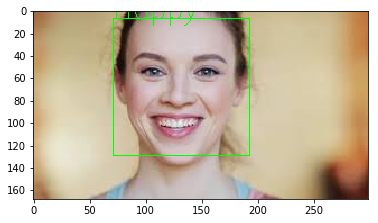

In [0]:
model = load_model(model_path)
emotion_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Sad',5:'Surprise',6:'Neutral'}
img = mpimg.imread('happy.jpg')
face_cascade = cv2.CascadeClassifier('')
#cv2.resize(img,(250,250))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.3,5)
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
  roi_gray = gray[y:y+h,x:x+w]
  cropped_img = cv2.resize(roi_gray,(48,48))
  #cv2.normalize(cropped_img,cropped_img,alpha=0,beta=1,norm_type=cv2.NORM_L2,dtype = cv2.CV_32F)
  x1 = image.img_to_array(cropped_img)
  x1 = np.expand_dims(x1, axis = 0)

  x1 /= 255
  prediction = model.predict(x1)
  
  c = (0,255,0)

  cv2.putText(img, emotion_dict[int(np.argmax(prediction))],(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.8,color=c)
im = cv2.imwrite('pred_fear.jpg',img)
i = plt.imshow(img)


In [0]:
!pip install --upgrade opencv-python
import cv2

Requirement already up-to-date: opencv-python in /usr/local/lib/python3.6/dist-packages (4.1.0.25)


In [0]:
emotion_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Sad',5:'Surprise',6:'Neutral'}

model = load_model(model_path2)

vid_fps = 25

cnt = 0
vid = 'emot.mp4'
cp = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier(casc_path)
out = cv2.VideoWriter('output.mp4',0x7634706d, vid_fps, (int(cp.get(3)),int(cp.get(4))))

In [0]:

while True:
  ret , frame = cp.read()
  
  if ret:
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cnt = cnt+1
    
    faces = face_cascade.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),4)
      roi_gray = gray[y:y+h,x:x+w]
      cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray,(48,48)),-1),0)
      cv2.normalize(cropped_img,cropped_img,alpha=0,beta=1,norm_type=cv2.NORM_L2,dtype = cv2.CV_32F)

      prediction = model.predict(cropped_img)

      cv2.putText(frame, emotion_dict[int(np.argmax(prediction))],(x,y),cv2.FONT_HERSHEY_SIMPLEX,1.2,(0,255,0),1,cv2.LINE_AA)

      
    out.write(frame)
    print('frame',cnt)

      #cv2.imshow('frame',frame)
  else:
    print('failed')
    cp.release()
    cv2.destroyAllWindows()
    break

frame 1
frame 2
frame 3
frame 4
frame 5
frame 6
frame 7
frame 8
frame 9
frame 10
frame 11
frame 12
frame 13
frame 14
frame 15
frame 16
frame 17
frame 18
frame 19
frame 20
frame 21
frame 22
frame 23
frame 24
frame 25
frame 26
frame 27
frame 28
frame 29
frame 30
frame 31
frame 32
frame 33
frame 34
frame 35
frame 36
frame 37
frame 38
frame 39
frame 40
frame 41
frame 42
frame 43
frame 44
frame 45
frame 46
frame 47
frame 48
frame 49
frame 50
frame 51
frame 52
frame 53
frame 54
frame 55
frame 56
frame 57
frame 58
frame 59
frame 60
frame 61
frame 62
frame 63
frame 64
frame 65
frame 66
frame 67
frame 68
frame 69
frame 70
frame 71
frame 72
frame 73
frame 74
frame 75
frame 76
frame 77
frame 78
frame 79
frame 80
frame 81
frame 82
frame 83
frame 84
frame 85
frame 86
frame 87
frame 88
frame 89
frame 90
frame 91
frame 92
frame 93
frame 94
frame 95
frame 96
frame 97
frame 98
frame 99
frame 100
frame 101
frame 102
frame 103
frame 104
frame 105
frame 106
frame 107
frame 108
frame 109
frame 110
frame 11

In [0]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

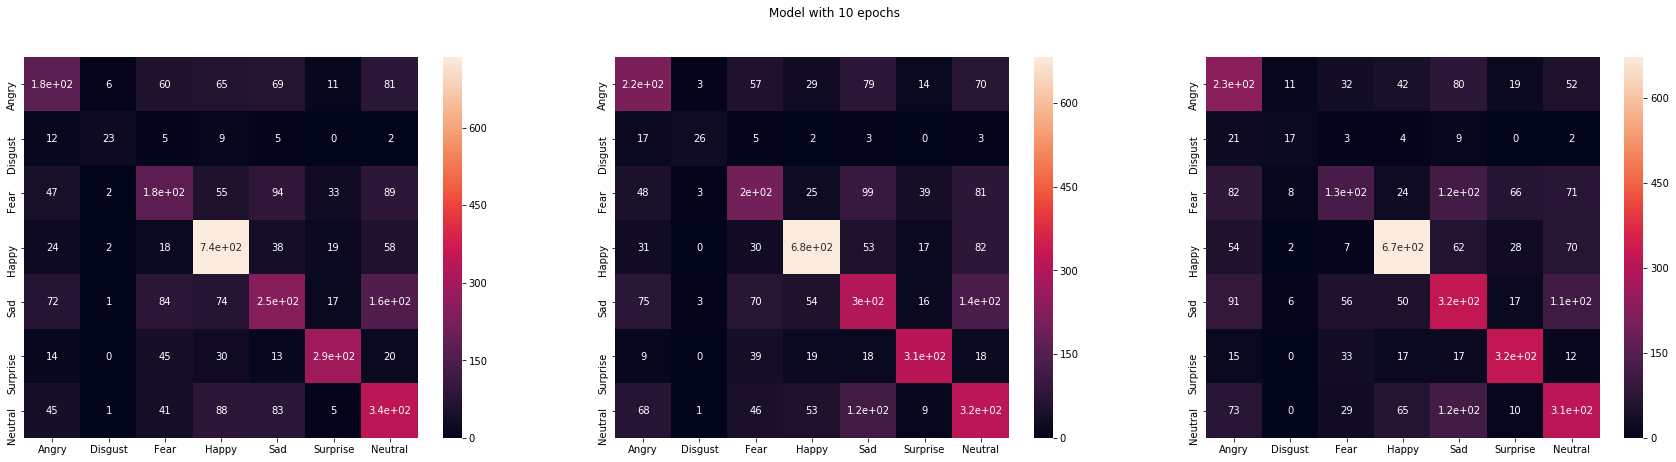

In [0]:

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_pr = np.argmax(y_test,axis=1)
conf_arr = confusion_matrix(y_test_pr,y_pred)
cn_df = pd.DataFrame(conf_arr,index= [i for k,i in emotion_dict.items()],columns= [i for k,i in emotion_dict.items()])

model2 = load_model(model_path2)

y_pred2 = model2.predict(x_test)
y_pred2 = np.argmax(y_pred2, axis=1)
y_test_pr2 = np.argmax(y_test,axis=1)
conf_arr2 = confusion_matrix(y_test_pr2,y_pred2)
cn_df2 = pd.DataFrame(conf_arr2,index= [i for k,i in emotion_dict.items()],columns= [i for k,i in emotion_dict.items()])

model3 = load_model(model_path3)

y_pred3 = model3.predict(x_test)
y_pred3 = np.argmax(y_pred3, axis=1)
y_test_pr3 = np.argmax(y_test,axis=1)
conf_arr3 = confusion_matrix(y_test_pr3,y_pred3)
cn_df3 = pd.DataFrame(conf_arr3,index= [i for k,i in emotion_dict.items()],columns= [i for k,i in emotion_dict.items()])

plt.figure(figsize=(30,7))
plt.subplot(1,3,1)
plt.suptitle("Model with 15 epochs")
sn.heatmap(cn_df,annot=True)
plt.subplot(1,3,2)
plt.suptitle("Model with 20 epochs")
sn.heatmap(cn_df2,annot=True)
plt.subplot(1,3,3)
plt.suptitle("Model with 10 epochs")
sn.heatmap(cn_df3,annot=True)
